<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [165]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [166]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Demo: How to run an sql query


In [168]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [169]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [170]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [171]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [172]:
# your code goes here
query = '''
select * from master'''

df = pd.read_sql_query(query, conn, index_col='index')
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
index,,,,,,,,,,,,,,,,,,,,,
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult


In [173]:
xticks = list(np.linspace(0, 2000000, 16))
xticks

[0.0,
 133333.33333333334,
 266666.6666666667,
 400000.0,
 533333.3333333334,
 666666.6666666667,
 800000.0,
 933333.3333333334,
 1066666.6666666667,
 1200000.0,
 1333333.3333333335,
 1466666.6666666667,
 1600000.0,
 1733333.3333333335,
 1866666.6666666667,
 2000000.0]

Text(0.5, 1.0, 'Distribution of Salary')

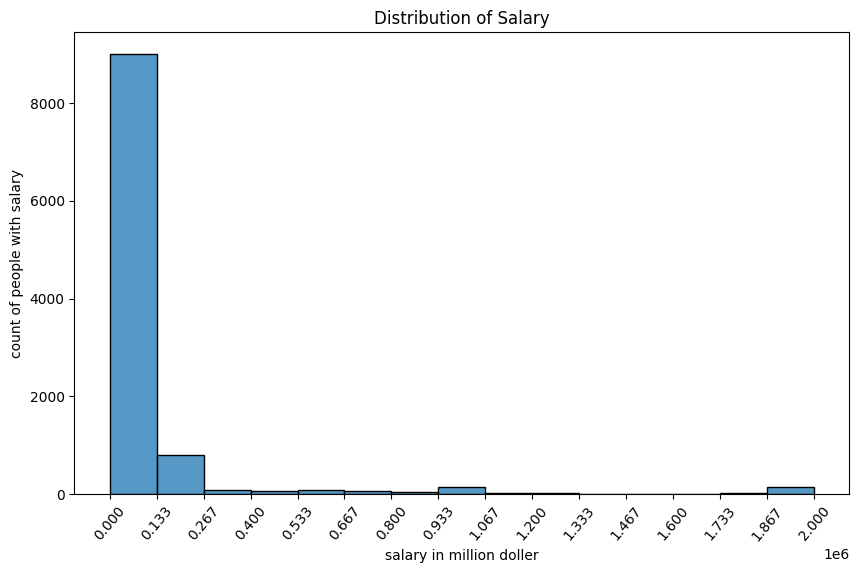

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='ConvertedComp', bins=15)
plt.xticks(ticks=xticks, rotation = 50)
plt.xlabel('salary in million doller')
plt.ylabel('count of people with salary')
plt.title('Distribution of Salary')

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Distribution of Age')

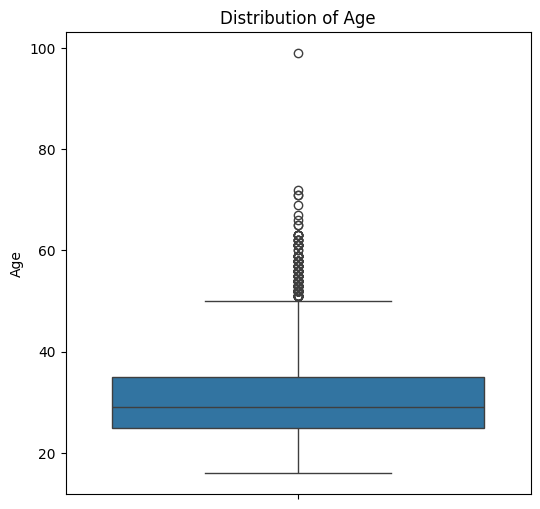

In [175]:
# your code goes here
plt.figure(figsize=(6, 6))
sns.boxplot(df, y='Age')
plt.title('Distribution of Age')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0.5, 1.0, 'Relationship between Age and WorkWeekHrs')

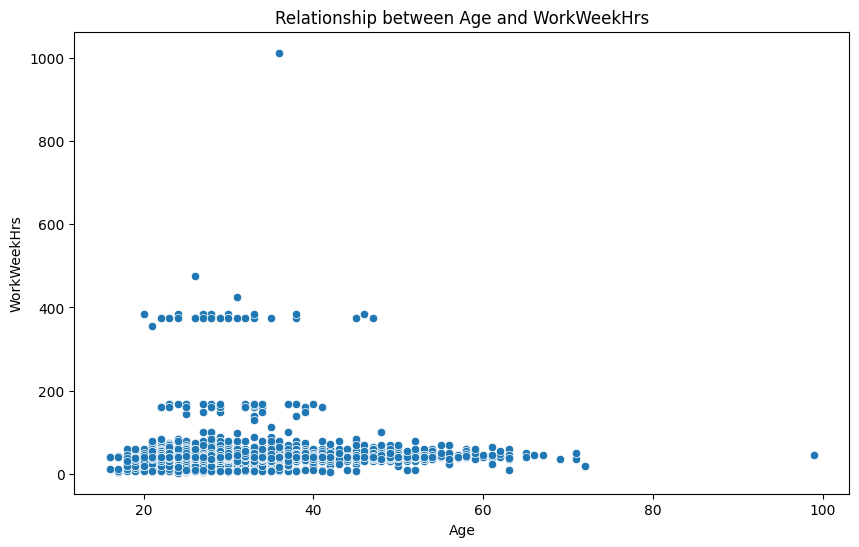

In [176]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Age', y='WorkWeekHrs')
plt.title('Relationship between Age and WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 1.0, 'Relationship between Age and WorkWeekHrs')

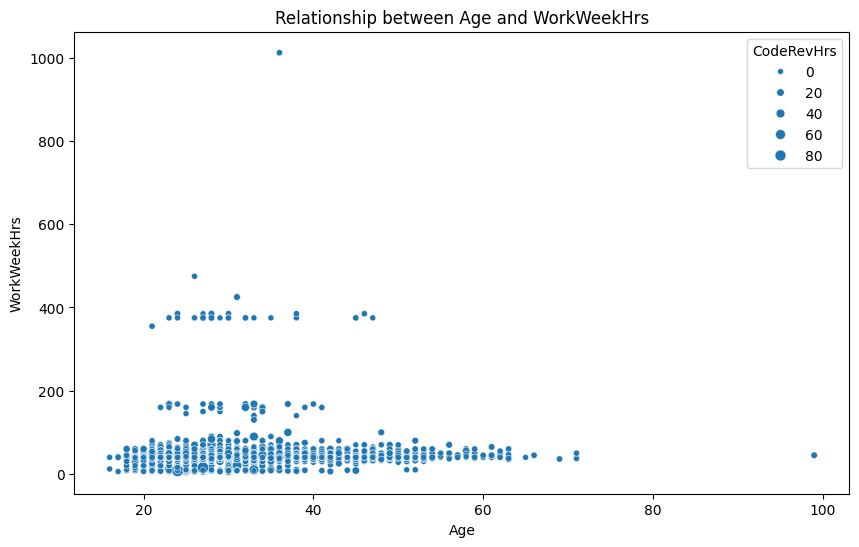

In [177]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Age', y='WorkWeekHrs', size='CodeRevHrs')
# plt.legend()
plt.title('Relationship between Age and WorkWeekHrs')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [190]:
query = '''
SELECT count(Respondent)
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
AND Respondent NOT IN (
    SELECT Respondent
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith <> 'MySQL'
);
'''
df_l_5 = pd.read_sql_query(query, conn)
df_l_5

,count(Respondent)
0,474


In [191]:
query = '''
select DevType, count(*) as cnt from
DevType
group by DevType
order by cnt desc
'''
df_d_5 = pd.read_sql_query(query, conn)
df_d_5

,DevType,cnt
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


In [185]:
# your code goes here
query = '''
select DatabaseDesireNextYear, count(*) as cnt from
DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by cnt desc
'''
df_db_5 = pd.read_sql_query(query, conn)
df_db_5

,DatabaseDesireNextYear,cnt
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


Text(0.5, 1.0, 'top 5 databases that respondents wish to learn next year')

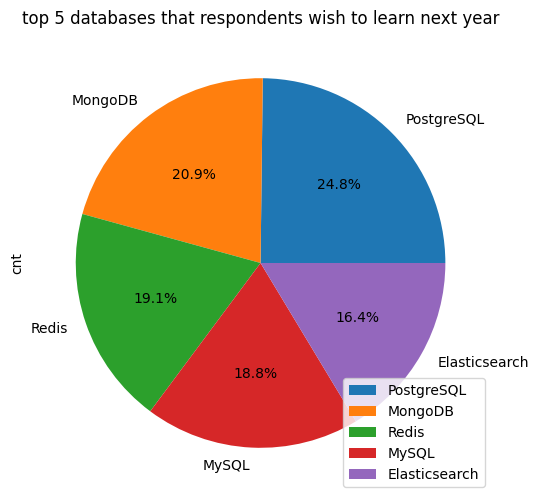

In [179]:
# plt.figure(figsize=(10, 6))
df_db_5.plot(kind='pie', y='cnt', labels=df_db_5['DatabaseDesireNextYear'], figsize=(10, 6), autopct = '%1.1f%%')
plt.legend(loc = 'lower right')
plt.title('top 5 databases that respondents wish to learn next year')

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [148]:
# your code goes here
query = '''
select WorkWeekHrs, CodeRevHrs from master
where age <= 35 and age >= 30'''

df_wc_a = pd.read_sql_query(query, conn)
df_wc_a.head()

,WorkWeekHrs,CodeRevHrs
0,8.0,3.0
1,40.0,2.0
2,40.0,2.0
3,42.0,15.0
4,40.0,2.0


Text(0.5, 1.0, 'Code Rev Hours and Weekly Work Hours')

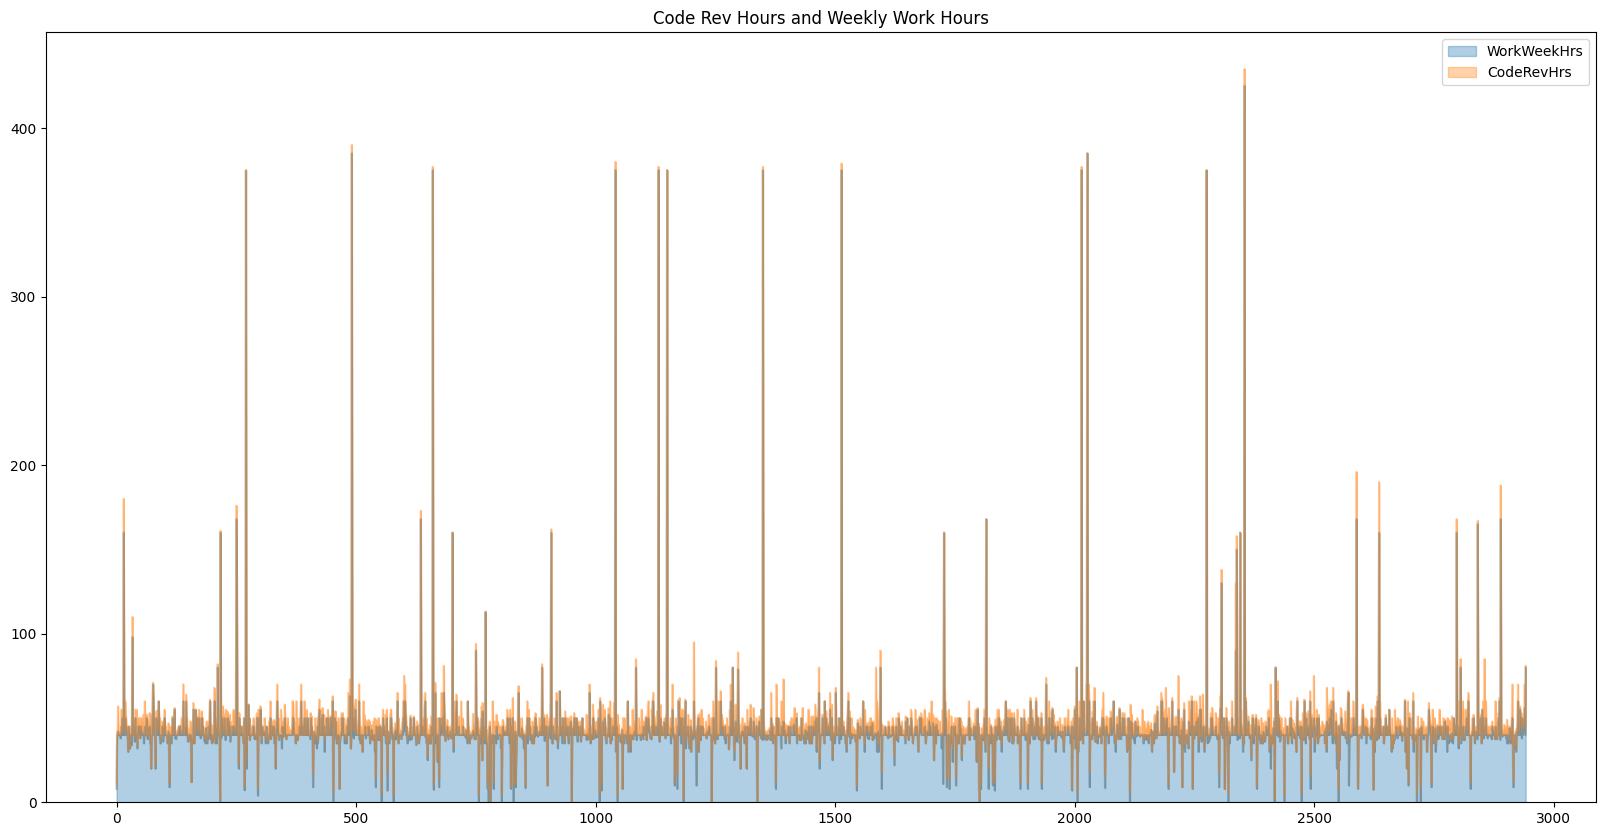

In [149]:
ax = df_wc_a.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Code Rev Hours and Weekly Work Hours')


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [192]:
# your code goes here
query = '''
select age, AVG(ConvertedComp) as Converted_Comp from master
group by age
having age >= 25 and age <= 30
'''

df_line = pd.read_sql_query(query, conn)
df_line.head()

,Age,Converted_Comp
0,25.0,85446.644118
1,26.0,96878.398519
2,27.0,121776.398496
3,28.0,114056.507545
4,29.0,153095.391104


Text(0.5, 1.0, 'Converted Comp average per Age')

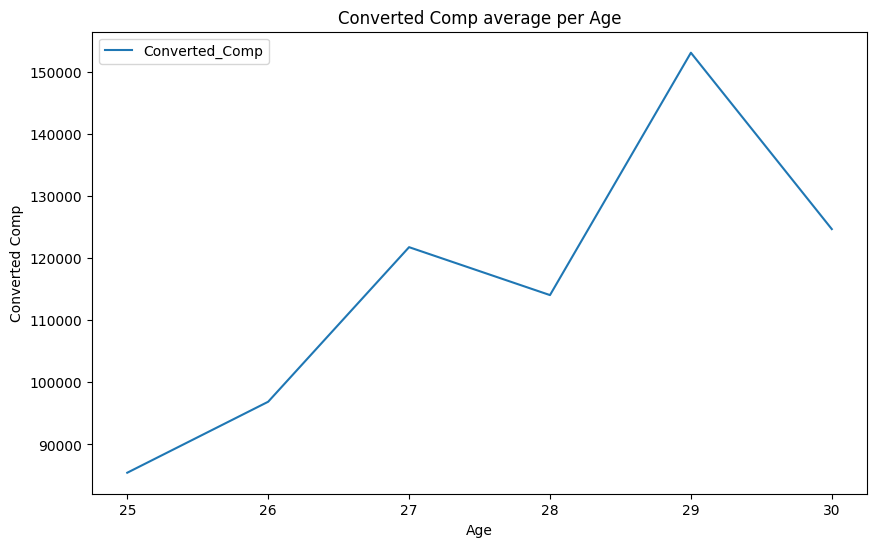

In [193]:
df_line.plot(kind='line', x = 'Age', y = 'Converted_Comp', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Converted Comp')
plt.title('Converted Comp average per Age')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 0, 'Number of People')

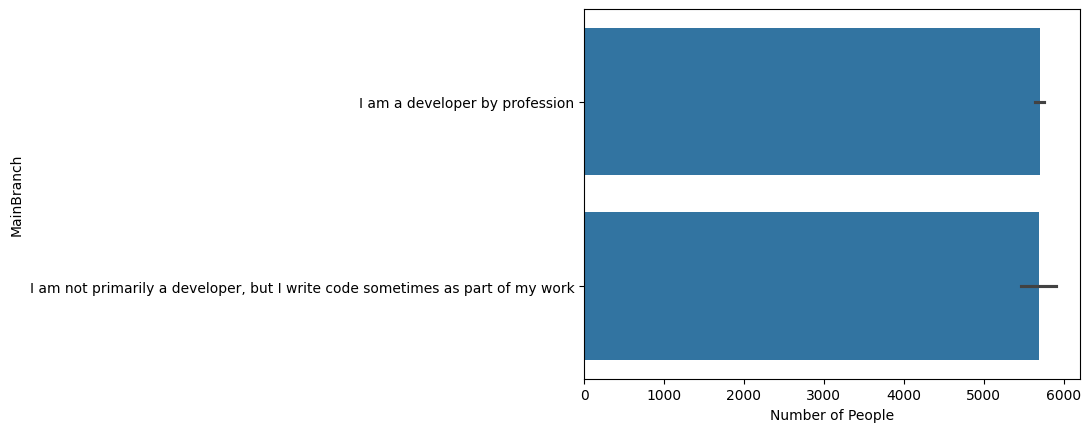

In [163]:
# your code goes here
sns.barplot(df['MainBranch'])
plt.xlabel('Number of People')


Close the database connection.


In [164]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
